Assignment 1 - Image Classification
This notebook contains the required task for the first assignment of the Software for Advanced Machine Learning course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a pre-trained Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to Canvas or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

Note Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

Rules and Comments
From the list of datasets and architectures listed in canvas, each student was atributed 1 dataset and 1 architecture to use within this assignment. Please confirm yours in the Canvas assignment's description.
This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
As always, copying others' code will make you fail the homework automatically (and thus the course). Remember that you will have to defend the assignment at the end of the semester.
Deadline is October 21
Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
Please add your name and Neptun ID below for easier identification.
**Name:Lu Fengjiao *Neptun ID:D0XK5B**

Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem.

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but your accuracy should be better than random guessing and your loss has to decrease throughout the epochs. We expect you to use Tensorboard for visualizing the accuracy, loss and details about the model and use Early stopping while training your network

# **0. Import libraries**



Import all libraries/packages that you believe will help you fulfil the task, but for the network only PyTorch can be used.

In [1]:
import numpy as np
import math
from typing import List
import os
from torchvision import transforms
import torchvision.datasets as datasets
import torch.utils.data as loader
from torchvision import models
import torch
import torch.nn as nn
import time
from PIL import Image
import requests
import matplotlib.pyplot as plt

## 1. Dataset 
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

In [ ]:
import json
token = {"username":"lufengjiao","key":"7c44ad4f8e1a7422c17f7c86bde03c62"}
with open('/kaggle.json', 'w') as file:
  json.dump(token, file)

!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg 

#### Pre-processing the dataset

In [2]:
train_set = datasets.ImageFolder(root='fruits-360_dataset/fruits-360/Training/',
						  transform=transforms.Compose([
							  transforms.ToTensor(),
							  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #based on the dataset
						  ]))

test_set = datasets.ImageFolder(root='fruits-360_dataset/fruits-360/Test',
						 transform=transforms.Compose([
							 transforms.ToTensor(),
							 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
						 ]))

class_names = train_set.classes
class_names = [classes for classes in class_names]
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

#### Splitting the dataset

In [3]:
# ADD YOUR CODE HERE
number=2000
print('train:', len(train_set), 'test:', len(test_set))
train_db, val_db = loader.random_split(train_set, [40000, len(train_set)-40000])
train_db1,train_db2=loader.random_split(train_db,[number,len(train_db)-number])
val_db1,val_db2=loader.random_split(val_db,[number,len(val_db)-number])
print('train:', len(train_db1), 'validation:', len(val_db1))


training_set_loader =loader.DataLoader(train_db1, batch_size=100, num_workers=0, shuffle=True)
validation_set_loader = loader.DataLoader(val_db1, batch_size=100, num_workers=0, shuffle=True)
testing_set_loader = loader.DataLoader(test_set, batch_size=100, num_workers=0, shuffle=False)
train_data_size=len(training_set_loader)
valid_data_size=len(validation_set_loader)
test_data_size=len(testing_set_loader)

train: 67692 test: 22688
train: 2000 validation: 2000


#### Loading the dataset
Show some images and labels of your dataset

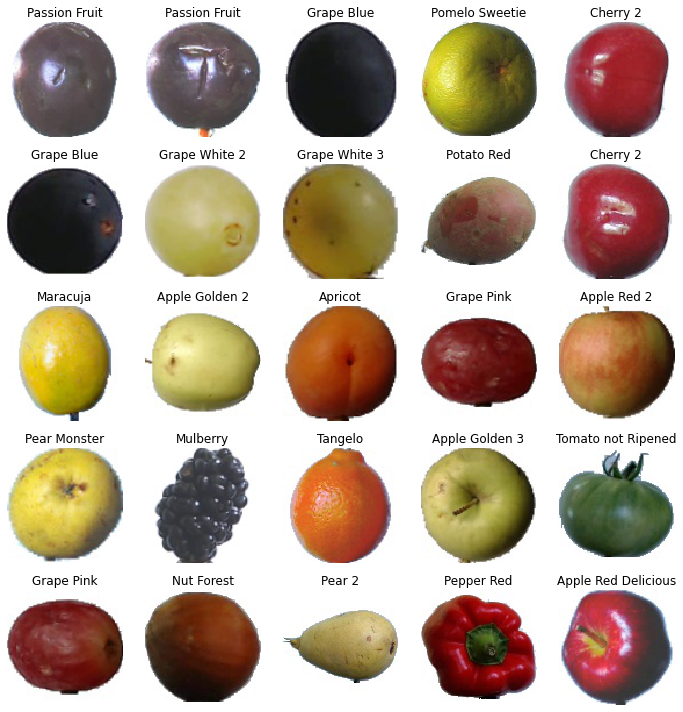

In [4]:
sampler =loader.RandomSampler(train_set, num_samples=256, replacement=True)
train_loader =loader.DataLoader(train_set, sampler=sampler, shuffle=False, batch_size=100, num_workers=0)
print(train_loader)
dataiter = iter(train_loader)
images, labels = dataiter.next()
plt.figure(figsize=(10,10))
for i in range(5*5):
  plt.subplot(5, 5, i+1)
  plt.title(class_names[labels.numpy()[i]])
  img = images[i].permute(1,2,0)
  img = torch.tensor([0.229, 0.224, 0.225])*img + torch.tensor([0.485, 0.456, 0.406])
  plt.axis('off')
  plt.imshow(img, interpolation='none')
  plt.tight_layout()

## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results with Tensorboard.

In [5]:
# ADD YOUR CODE HERE
resnet18=models.resnet18(pretrained=True)
fc_inputs = resnet18.fc.in_features
resnet18.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, len(class_names)), #change into the number of class
    nn.LogSoftmax(dim=1)
)

#### Define your optimizer and loss function

In [6]:
# ADD YOUR CODE HERE

loss_func = nn.NLLLoss()
optimizer = torch.optim.Adam(resnet18.parameters())

#### Train your network

#### Show results (accuracy and loss) on training and validation sets

In [7]:
# ADD YOUR CODE HERE
def train_and_valid(model, loss_function, optimizer, epochs=6):
    record = []
    best_acc = 0.0
    best_epoch = 0

    for epoch in range(epochs):#tarin for epochs times
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch + 1, epochs))

        model.train()#train model

        train_loss = 0.0
        train_acc = 0.0
        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(training_set_loader):
            optimizer.zero_grad()

            outputs = model(inputs)

            loss = loss_function(outputs, labels)

            loss.backward()

            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            train_acc += acc.item() * inputs.size(0)

        with torch.no_grad():
            model.eval()#validation

            for j, (inputs, labels) in enumerate(validation_set_loader):
                outputs = model(inputs)

                loss = loss_function(outputs, labels)

                valid_loss += loss.item() * inputs.size(0)

                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                valid_acc += acc.item() * inputs.size(0)

        avg_train_loss = train_loss / train_data_size
        avg_train_acc = train_acc / train_data_size

        avg_valid_loss = valid_loss / valid_data_size
        avg_valid_acc = valid_acc / valid_data_size

        record.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        if avg_valid_acc > best_acc  :#record the best acc model
            best_acc = avg_valid_acc
            best_epoch = epoch + 1

        epoch_end = time.time()

        print("Epoch: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation: Loss: {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(
                epoch + 1, avg_valid_loss, avg_train_acc, avg_valid_loss, avg_valid_acc,
                epoch_end - epoch_start))
        print("Best Accuracy for validation : {:.4f} at epoch {:03d}".format(best_acc, best_epoch))
    return model, record

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

#### Show some predictions

In [8]:
# ADD YOUR CODE HERE
num_epochs = 20
trained_model, record = train_and_valid(resnet18, loss_func, optimizer, num_epochs)

Epoch: 1/20


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 001, Training: Loss: 270.5200, Accuracy: 28.4500%, 
		Validation: Loss: 270.5200, Accuracy: 39.0000%, Time: 162.1089s
Best Accuracy for validation : 39.0000 at epoch 001
Epoch: 2/20
Epoch: 002, Training: Loss: 87.9797, Accuracy: 73.2000%, 
		Validation: Loss: 87.9797, Accuracy: 82.2500%, Time: 161.2690s
Best Accuracy for validation : 82.2500 at epoch 002
Epoch: 3/20
Epoch: 003, Training: Loss: 99.1911, Accuracy: 89.7000%, 
		Validation: Loss: 99.1911, Accuracy: 74.2500%, Time: 159.6134s
Best Accuracy for validation : 82.2500 at epoch 002
Epoch: 4/20
Epoch: 004, Training: Loss: 34.3480, Accuracy: 94.7000%, 
		Validation: Loss: 34.3480, Accuracy: 90.9500%, Time: 159.6104s
Best Accuracy for validation : 90.9500 at epoch 004
Epoch: 5/20
Epoch: 005, Training: Loss: 20.2111, Accuracy: 96.8500%, 
		Validation: Loss: 20.2111, Accuracy: 94.7000%, Time: 159.8600s
Best Accuracy for validation : 94.7000 at epoch 005
Epoch: 6/20
Epoch: 006, Training: Loss: 19.6126, Accuracy: 98.1500%, 
		Val

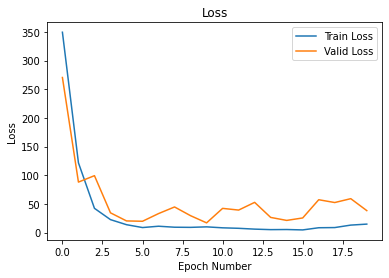

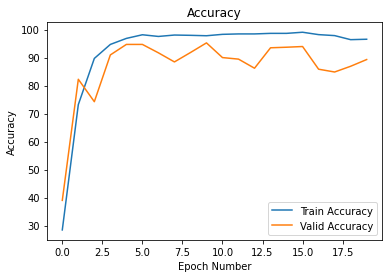

In [9]:
record = np.array(record)
plt.plot(record[:, 0:2])
plt.legend(['Train Loss', 'Valid Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title("Loss")
plt.show()

plt.plot(record[:, 2:4])
plt.legend(['Train Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()


#### Answer the questions

I think my model is underfitted,because the accuracy of train set and the validation set is very closed.I think it’s because of  the model's learning ability is weak and the data complexity is high. At this time, the model cannot learn the regular parttern in the data set due to insufficient learning ability, which leads to the model is underfitted.